# Project (final assessment of STK 353)

In [4]:
# imports

import Datasets
from Datasets import Source_Code
#import nltk; nltk.download('all')
import pandas as pd
import re
from nltk.corpus import stopwords
import string # for translating strings to not have any punctuation
import nltk # for lemmatization
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# get datasets from source code
Honda_accord_2008_data = Source_Code.send_honda_accord_2008_data()
Honda_accord_2009_data = Source_Code.send_honda_accord_2009_data()
Hyundai_sonata_2009_data = Source_Code.send_hyundai_sonata_2008_data()
Toyota_corolla_2009_data = Source_Code.send_toyota_corolla_2009_data() 


def read_file(filename):
    with open(filename, 'r', encoding='ISO-8859-1') as file:
        text = file.read()
    return text


honda_2008_text = read_file('Datasets/2008_honda_accord')
honda_2009_text = read_file('Datasets/2009_honda_accord')
hyundai_2009_text = read_file('Datasets/2009_hyundai_sonata')
toyota_2009_text = read_file('Datasets/2009_toyota_corolla')

# You can count the comments based on a delimiter or pattern you know each dataset uses to separate comments.
# For this example, let's assume each comment is separated by a newline character.
honda_2008_reviews = honda_2008_text.split('\n')
honda_2008_reviews_un = honda_2008_reviews
honda_2009_reviews = honda_2009_text.split('\n')
honda_2009_reviews_un = honda_2009_reviews
hyundai_2009_reviews = hyundai_2009_text.split('\n')
toyota_2009_reviews = toyota_2009_text.split('\n')



Let's discuss the car datasets `2009_honda_accord`, `2009_hyundai_sonata`, and `2009_toyota_corolla`. These datasets contain customer reviews for three different car models from 2009. 

1. As a stakeholder representing these companies, your objective is to determine which car has acheived the highest customer satisfaction rate among the three.

2. Additionally, you want to investigate whether the satisfaction rate for the Honda Accord has improved from 2008 to 2009. To answer this question, you will also need to analyze the dataset `2008_honda_accord`, which consists of customer reviews for the Honda Accord from the year 2008.

3. In the end, your final goal is to categorize the customer reviews for the Honda Accord (only those of the year 2008) into $k$ meaningful groups.

To answer the above questions, please consider the following points:
- a) Obtain the number of comments given in all four reviews and report the results.
- b) In the cleaning process, using lemmatization rather than stemming is recommended (Why?)
- c) During the cleaning process, you also need to remove numbers and HTML tags e.g. `<DOC>, <TEXT>, <AUTHOR>` and similar elements.
- d)  The first two questions can be solved using sentiment analysis techniques.
- e) Create appropriate `wordcloud`s for each part to visualize the most frequent words in the reviews.
- f) Determine the optimal value of $k$ from the set $\{2, 3, 4, 5\}$ in Question 3.
- g) (_optional_) Feel free to obtain any other relevant outputs, such as evaluation metrics or additional plots.
- h) (_optional_) If you find that the algorithm used in Question 3 does not provide satisfactory performance, you can try incorporating the datasets `2008_honda_accord` and `2009_honda_accord` to cluster the reviews again, aiming for better results.

# Project (final assessment of STK 353)

In [5]:
# a) Obtain the number of comments given in all four reviews and report the results.

# Count the number of occurrences using a regex to count the number of comments
accord_08_comment_count = len(Honda_accord_2008_data['doc'].isna())
accord_09_comment_count =  len(Honda_accord_2009_data['doc'].isna())
sonata_09_comment_count =  len(Hyundai_sonata_2009_data['doc'].isna())
corolla_09_comment_count =  len(Toyota_corolla_2009_data['doc'].isna())
net_comment_count = sum([accord_08_comment_count, accord_09_comment_count, sonata_09_comment_count, corolla_09_comment_count])


#print("This is the length of all the comments: ", len(Toyota_corolla_2009_data))

#print results
print('Below is a list of the number of comments by car and year: ')
print('2008 Honda Accord:', accord_08_comment_count)
print('2009 Honda Accord:', accord_09_comment_count)
print('2009 Hyundai Sonata:', sonata_09_comment_count)
print('2009 Toyota Corolla:', corolla_09_comment_count)
print("Total count of comments:", net_comment_count)

Below is a list of the number of comments by car and year: 
2008 Honda Accord: 540
2009 Honda Accord: 224
2009 Hyundai Sonata: 262
2009 Toyota Corolla: 226
Total count of comments: 1252


In [6]:
# Reporting Part A

print("The Results show that the 2008 Honda Accord had the most comments, followed by the 2009 Hyundai Sonata.")
print("The 2009 Honda Accord and the 2009 Toyota Corolla had similar numbers of comments, with the former slightly lower than the latter. ")
print("This suggests that the 2008 Honda Accord was the most popular or controversial car among the four, while the 2009 Honda Accord and the 2009 Toyota Corolla were less so. The 2009 Hyundai Sonata was somewhere in between.")

The Results show that the 2008 Honda Accord had the most comments, followed by the 2009 Hyundai Sonata.
The 2009 Honda Accord and the 2009 Toyota Corolla had similar numbers of comments, with the former slightly lower than the latter. 
This suggests that the 2008 Honda Accord was the most popular or controversial car among the four, while the 2009 Honda Accord and the 2009 Toyota Corolla were less so. The 2009 Hyundai Sonata was somewhere in between.


In [7]:
#- b) In the cleaning process, using lemmatization rather than stemming is recommended (Why?)

#Imports
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('stopwords')

# Initializing the lemmatizer
lemmatizer = WordNetLemmatizer()

print("Here we demonstrate why lemmatization is better thatn stemming in text clearning")

# Sample Text
text = "In this STK353 Project, we are comparing reviews or comments about three different car models from two different years"

# Tokenizing the text
tokens = word_tokenize(text)

# Removing stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

# Stemming
porter_stemmer = PorterStemmer()
stemmed_tokens = [porter_stemmer.stem(word) for word in filtered_tokens]

# Print original tokens, filtered tokens, lemmatized tokens, and stemmed tokens
print("Original Tokens:", tokens)
print("Filtered Tokens (without stopwords):", filtered_tokens)
print("Lemmatized Tokens:", lemmatized_tokens)
print("Stemmed Tokens:", stemmed_tokens)

Here we demonstrate why lemmatization is better thatn stemming in text clearning
Original Tokens: ['In', 'this', 'STK353', 'Project', ',', 'we', 'are', 'comparing', 'reviews', 'or', 'comments', 'about', 'three', 'different', 'car', 'models', 'from', 'two', 'different', 'years']
Filtered Tokens (without stopwords): ['STK353', 'Project', ',', 'comparing', 'reviews', 'comments', 'three', 'different', 'car', 'models', 'two', 'different', 'years']
Lemmatized Tokens: ['STK353', 'Project', ',', 'comparing', 'review', 'comment', 'three', 'different', 'car', 'model', 'two', 'different', 'year']
Stemmed Tokens: ['stk353', 'project', ',', 'compar', 'review', 'comment', 'three', 'differ', 'car', 'model', 'two', 'differ', 'year']


In [8]:
# Part B reporting

print('When Lemmatizing the 2008 honda accord car reviews, we see the effect of lemmatization, but we do not see how far better it is than stemming.')
print('However, when we look at the comparison we just did between stemming and lemmatizing, we can observe that: ')
print('lemmatization can preserve the meaning and the part of speech of the original words, while stemming can create non-existent or incorrect words that can confuse the analysis.')
print('For example, the word comparing remained original after lemmatization, but it was change to compar after stemming, which is a non-existent word')
print('This proves why lemmatization is recommended over stemming')

When Lemmatizing the 2008 honda accord car reviews, we see the effect of lemmatization, but we do not see how far better it is than stemming.
However, when we look at the comparison we just did between stemming and lemmatizing, we can observe that: 
lemmatization can preserve the meaning and the part of speech of the original words, while stemming can create non-existent or incorrect words that can confuse the analysis.
For example, the word comparing remained original after lemmatization, but it was change to compar after stemming, which is a non-existent word
This proves why lemmatization is recommended over stemming


In [13]:

#- c) During the cleaning process, you also need to remove numbers and HTML tags e.g. `<DOC>, <TEXT>, <AUTHOR>` and similar elements.

# Now we create a method to do a simple cleaning and lemmatizing for the car
def clean_text(text):
    # Removing HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Removing numbers
    text = re.sub(r'\d+', '', text)
    # Lemmatizing and removing stop words
    words = text.split()
    cleaned_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stopwords.words('english')]
    return ' '.join(cleaned_words)


# Applying cleaning to the comments
# For demonstration purposes, We will show the process for the 2008 Honda Accord reviews

honda_2008_reviews = [clean_text(review) for review in honda_2008_reviews]
honda_2009_reviews = [clean_text(review) for review in honda_2009_reviews]
hyundai_2009_reviews = [clean_text(review) for review in hyundai_2009_reviews]
toyota_2009_reviews = [clean_text(review) for review in toyota_2009_reviews]


In [14]:
#- d)  The first two questions can be solved using sentiment analysis techniques.

# Solving the first question using TextBlob
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Function to count comments based on sentiment
def count_comments_by_sentiment(reviews):
    positive_comments = 0
    neutral_comments = 0
    negative_comments = 0

    for comment in reviews:
        sentiment_polarity = get_sentiment_polarity(comment)
        
        if sentiment_polarity > 0:
            positive_comments += 1
        elif sentiment_polarity < 0:
            negative_comments += 1
        else:
            neutral_comments += 1

    return positive_comments, neutral_comments, negative_comments

# Count comments based on sentiment for each dataset
accord_08_positive, accord_08_neutral, accord_08_negative = count_comments_by_sentiment(Honda_accord_2008_data['doc'])
accord_09_positive, accord_09_neutral, accord_09_negative = count_comments_by_sentiment(Honda_accord_2009_data['doc'])
sonata_09_positive, sonata_09_neutral, sonata_09_negative = count_comments_by_sentiment(Hyundai_sonata_2009_data['doc'])
corolla_09_positive, corolla_09_neutral, corolla_09_negative = count_comments_by_sentiment(Toyota_corolla_2009_data['doc'])

# Print results
print('2008 Honda Accord (Positive, Neutral, Negative):', accord_08_positive, accord_08_neutral, accord_08_negative)
print('2009 Honda Accord (Positive, Neutral, Negative):', accord_09_positive, accord_09_neutral, accord_09_negative)
print('2009 Hyundai Sonata (Positive, Neutral, Negative):', sonata_09_positive, sonata_09_neutral, sonata_09_negative)
print('2009 Toyota Corolla (Positive, Neutral, Negative):', corolla_09_positive, corolla_09_neutral, corolla_09_negative)




2008 Honda Accord (Positive, Neutral, Negative): 465 1 74
2009 Honda Accord (Positive, Neutral, Negative): 200 0 24
2009 Hyundai Sonata (Positive, Neutral, Negative): 254 0 8
2009 Toyota Corolla (Positive, Neutral, Negative): 210 1 15


In [15]:
#Sentiment Analysis as averages 
from textblob import TextBlob

# Function to perform sentiment analysis and return the polarity
def analyze_sentiment(reviews):
    polarity_scores = [TextBlob(review).sentiment.polarity for review in reviews]
    return polarity_scores

# Calculate sentiment scores for the 2009 models
honda_2009_sentiments = analyze_sentiment(honda_2009_reviews)
hyundai_2009_sentiments = analyze_sentiment(hyundai_2009_reviews)
toyota_2009_sentiments = analyze_sentiment(toyota_2009_reviews)

# We can calculate average sentiment for each car to determine overall customer satisfaction
avg_sentiment_honda_2009 = sum(honda_2009_sentiments) / len(honda_2009_sentiments)
avg_sentiment_hyundai_2009 = sum(hyundai_2009_sentiments) / len(hyundai_2009_sentiments)
avg_sentiment_toyota_2009 = sum(toyota_2009_sentiments) / len(toyota_2009_sentiments)

print(f'Average sentiment for 2009 Honda Accord: {avg_sentiment_honda_2009}')
print(f'Average sentiment for 2009 Hyundai Sonata: {avg_sentiment_hyundai_2009}')
print(f'Average sentiment for 2009 Toyota Corolla: {avg_sentiment_toyota_2009}')


# Perform sentiment analysis on the 2008 reviews
honda_2008_sentiments = analyze_sentiment(honda_2008_reviews)

# Calculate the average sentiment for 2008 Honda Accord
avg_sentiment_honda_2008 = sum(honda_2008_sentiments) / len(honda_2008_sentiments)

# avg_sentiment_honda_2009 is calculated from the previous step

# Print the results to compare
print(f'Average sentiment for 2008 Honda Accord: {avg_sentiment_honda_2008}')
print(f'Average sentiment for 2009 Honda Accord: {avg_sentiment_honda_2009}')

# To determine if there is an improvement, compare the two averages
improvement = avg_sentiment_honda_2009 - avg_sentiment_honda_2008
if improvement > 0:
    print(f"Customer satisfaction for the Honda Accord improved from 2008 to 2009 by {improvement:.2f}.")
else:
    print(f"Customer satisfaction for the Honda Accord did not improve from 2008 to 2009; change: {improvement:.2f}.")

Average sentiment for 2009 Honda Accord: 0.07224525671277203
Average sentiment for 2009 Hyundai Sonata: 0.09131969663711302
Average sentiment for 2009 Toyota Corolla: 0.08231039929007068
Average sentiment for 2008 Honda Accord: 0.03477940227729432
Average sentiment for 2009 Honda Accord: 0.07224525671277203
Customer satisfaction for the Honda Accord improved from 2008 to 2009 by 0.04.


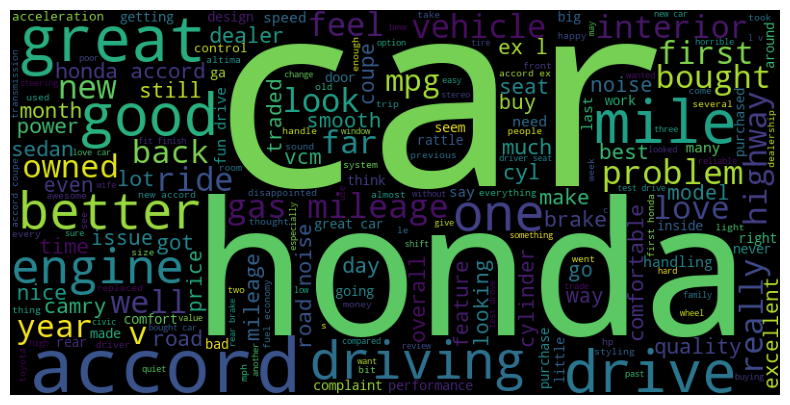

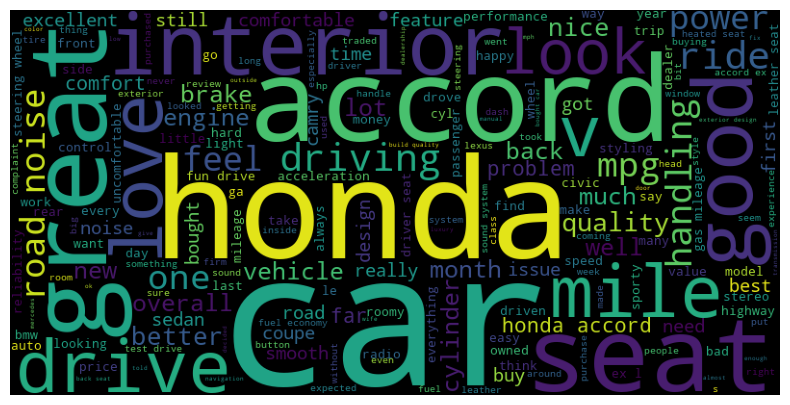

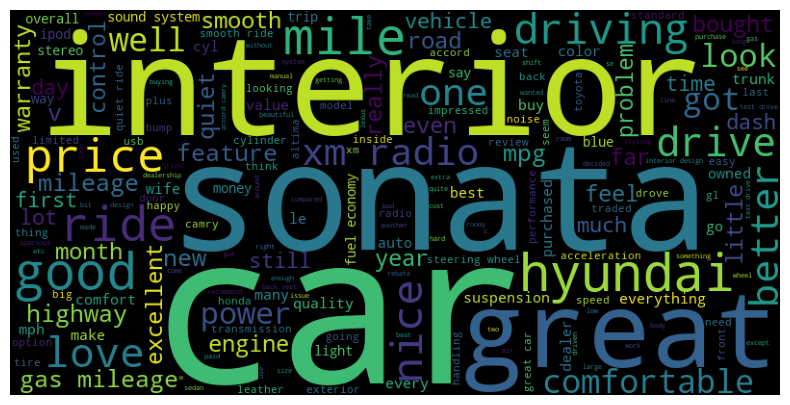

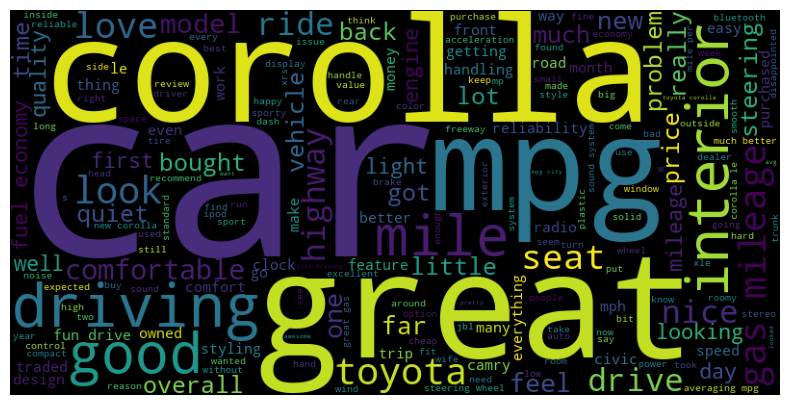

In [16]:
#- e) Create appropriate `wordcloud`s for each part to visualize the most frequent words in the reviews.

#imports

from wordcloud import WordCloud
import matplotlib.pyplot as plt


#code
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

# Generate wordclouds for each dataset
generate_wordcloud(' '.join(honda_2008_reviews))
generate_wordcloud(' '.join(honda_2009_reviews))
generate_wordcloud(' '.join(hyundai_2009_reviews))
generate_wordcloud(' '.join(toyota_2009_reviews))

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


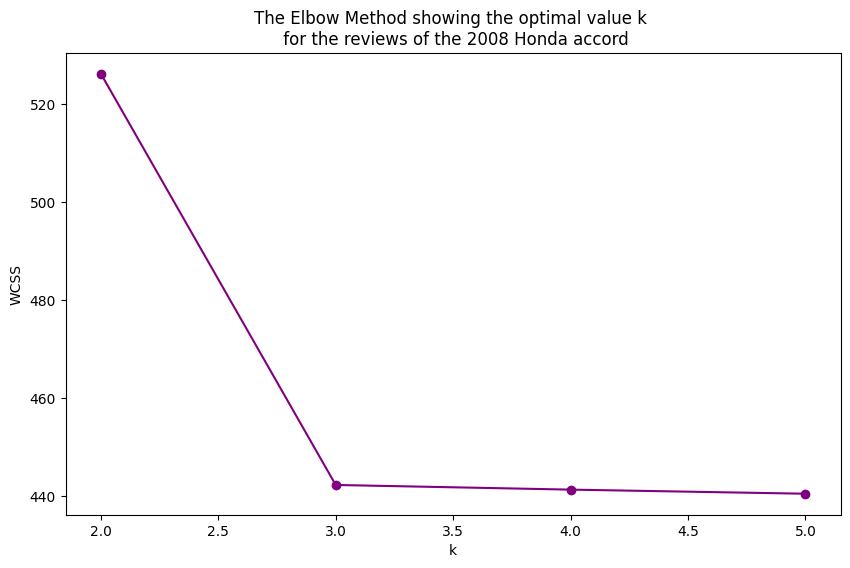

 When using the 2008 Honda Accord in our kmeans analysis we observe that: 
 The optimal value of K is k=3.
 This illustrates that the reviews can be fit into 3 main clusters to represent the underlying patterns in the data.


In [17]:
#- f) Determine the optimal value of k from the set {2, 3, 4, 5} in Question 3.

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Convert the cleaned reviews to a matrix of TF-IDF features.
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(honda_2008_reviews_un)

# Calculate WCSS for different values of k.
wcss = []
K = range(2, 6)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42)
    k_means.fit(tfidf_matrix)
    wcss.append(k_means.inertia_)
    clusters = k_means.labels_

# Plot the results to observe 'The Elbow'
plt.figure(figsize=(10,6))
plt.plot(K, wcss, 'o-', color='purple')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal value k \n for the reviews of the 2008 Honda accord')
plt.show()

print("\033[1m When using the 2008 Honda Accord in our kmeans analysis we observe that: \033[0m")
print(" The optimal value of K is k=3.")
print(" This illustrates that the reviews can be fit into 3 main clusters to represent the underlying patterns in the data.")


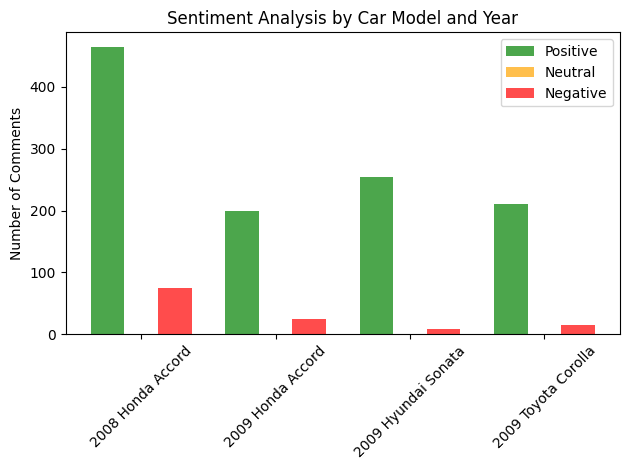

In [18]:
#- g) (_optional_) Feel free to obtain any other relevant outputs, such as evaluation metrics or additional plots.

import matplotlib.pyplot as plt
import numpy as np

# Data Preparation
labels = ['2008 Honda Accord', '2009 Honda Accord', '2009 Hyundai Sonata', '2009 Toyota Corolla']
positive_counts = [accord_08_positive, accord_09_positive, sonata_09_positive, corolla_09_positive]
neutral_counts = [accord_08_neutral, accord_09_neutral, sonata_09_neutral, corolla_09_neutral]
negative_counts = [accord_08_negative, accord_09_negative, sonata_09_negative, corolla_09_negative]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

# Plotting
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, positive_counts, width, label='Positive', color='green', alpha=0.7)
rects2 = ax.bar(x, neutral_counts, width, label='Neutral', color='orange', alpha=0.7)
rects3 = ax.bar(x + width, negative_counts, width, label='Negative', color='red', alpha=0.7)

# Add text for labels, title and custom x-axis tick labels
ax.set_ylabel('Number of Comments')
ax.set_title('Sentiment Analysis by Car Model and Year')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


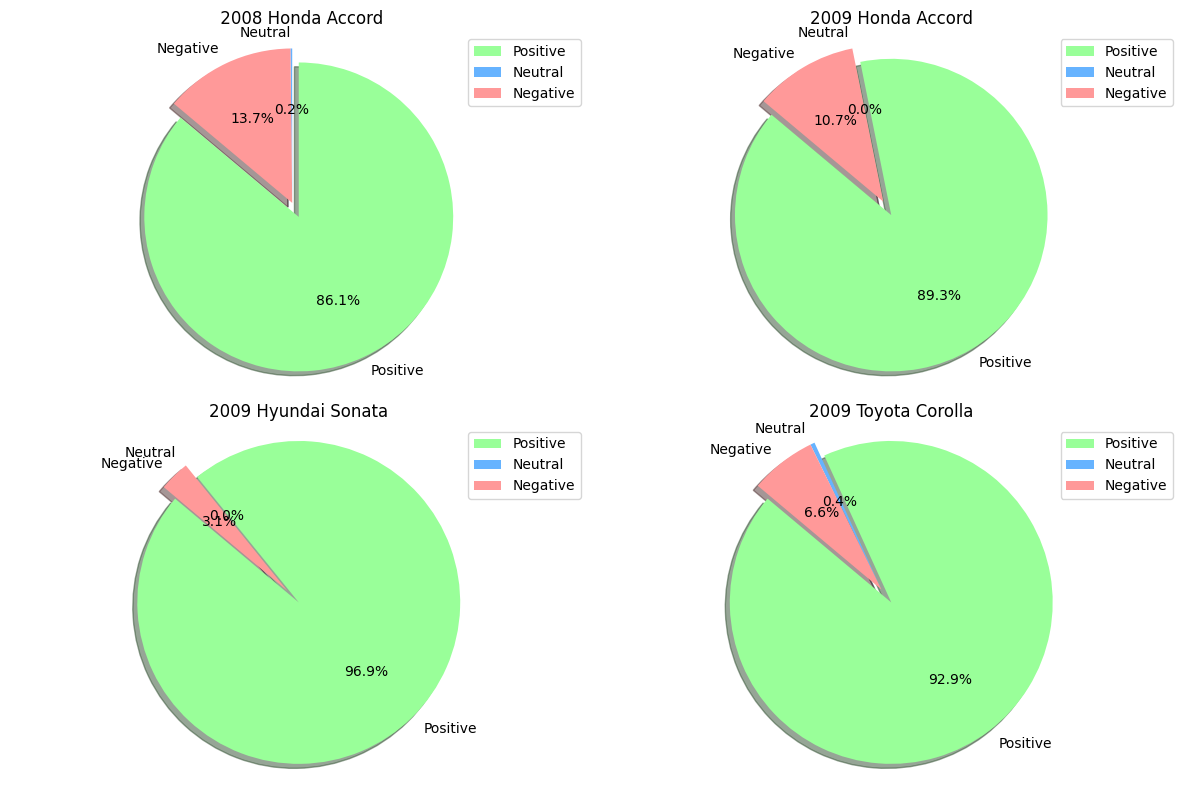

In [19]:
# Function to plot a pie chart for sentiment distribution
def plot_pie_chart(positive, neutral, negative, title):
    sizes = [positive, neutral, negative]
    labels = 'Positive', 'Neutral', 'Negative'
    colors = ['#99ff99','#66b3ff','#ff9999'] 
    explode = (0.1, 0, 0)  # explode 1st slice

    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(title)

# Plot pie charts
plt.figure(figsize=(12, 8))



plt.subplot(221)
plot_pie_chart(accord_08_positive, accord_08_neutral, accord_08_negative, ' 2008 Honda Accord')
plt.legend()

plt.subplot(222)
plot_pie_chart(accord_09_positive, accord_09_neutral, accord_09_negative, '2009 Honda Accord')
plt.legend()

plt.subplot(223)
plot_pie_chart(sonata_09_positive, sonata_09_neutral, sonata_09_negative, '2009 Hyundai Sonata')
plt.legend()

plt.subplot(224)
plot_pie_chart(corolla_09_positive, corolla_09_neutral, corolla_09_negative, '2009 Toyota Corolla')
plt.legend()

plt.tight_layout()
plt.show()


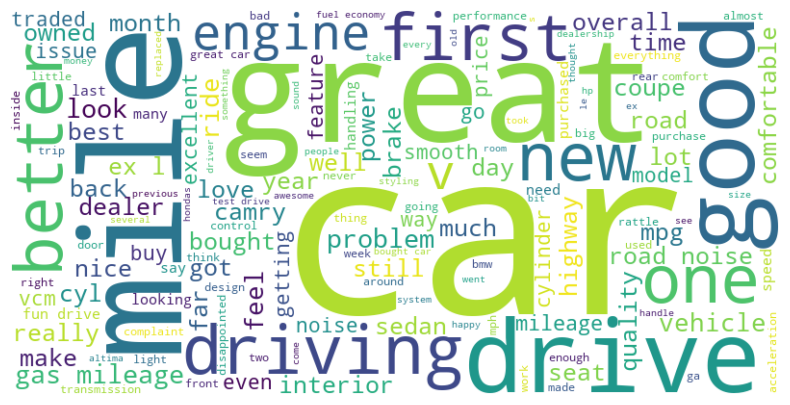

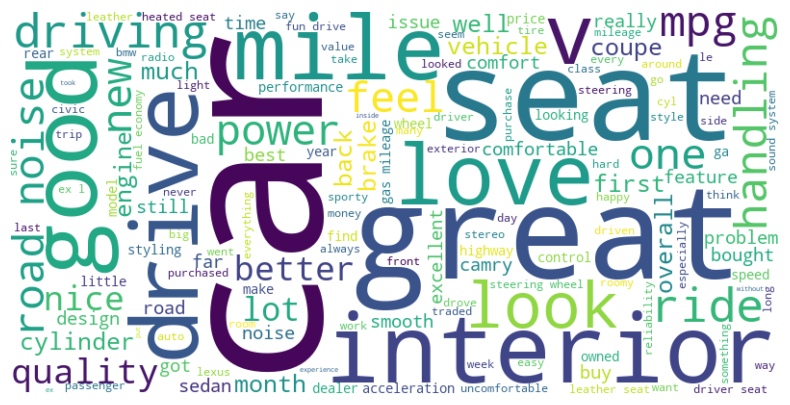

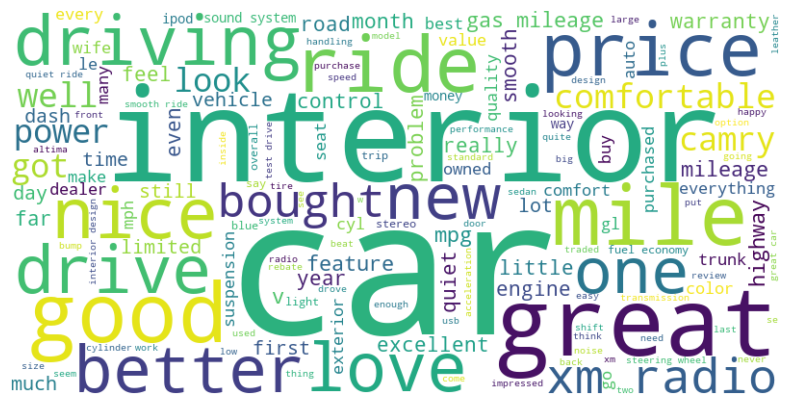

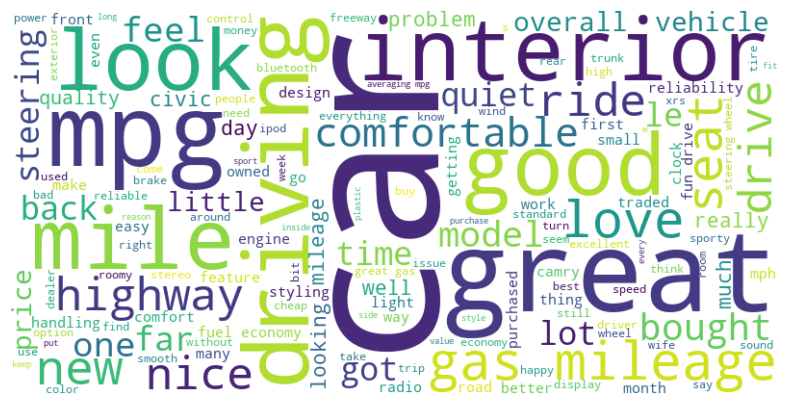

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_wordcloud(text, additional_stopwords=set()):
    # Combine default stopwords with your additional ones
    stopwords = set(STOPWORDS).union(additional_stopwords)

    # Create a WordCloud object with more formatting options
    wordcloud = WordCloud(width=800, height=400, 
                          background_color='white', 
                          stopwords=stopwords,
                          max_words=150, 
                          contour_color='black', 
                          contour_width=1,
                          colormap='viridis').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Define additional stopwords
my_stopwords = {'honda', 'accord', 'toyota', 'corolla', 'hyundai', 'sonata', 'car'}  # Replace 'word1', 'word2', ... with words you want to exclude

# Generate word clouds
generate_wordcloud(' '.join(honda_2008_reviews), my_stopwords)
generate_wordcloud(' '.join(honda_2009_reviews), my_stopwords)
generate_wordcloud(' '.join(hyundai_2009_reviews), my_stopwords)
generate_wordcloud(' '.join(toyota_2009_reviews), my_stopwords)


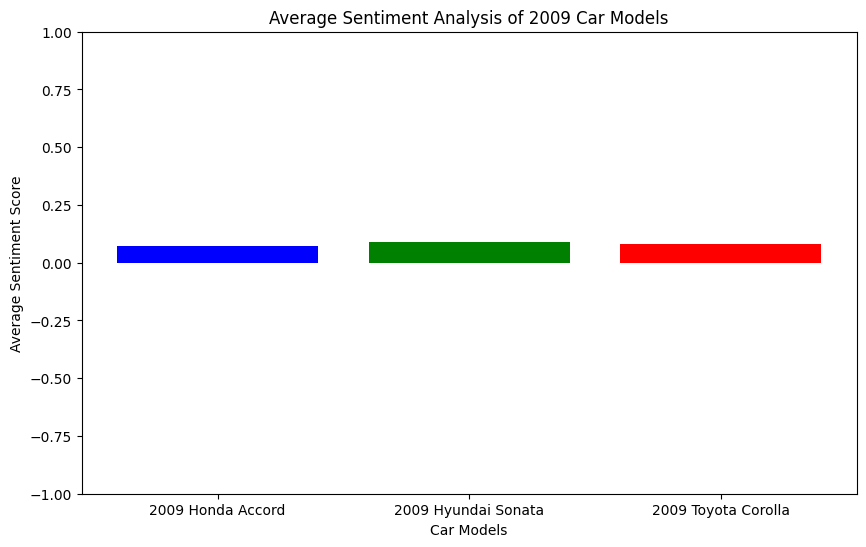

In [21]:
import matplotlib.pyplot as plt

# Data
cars = ['2009 Honda Accord', '2009 Hyundai Sonata', '2009 Toyota Corolla']
avg_sentiments = [avg_sentiment_honda_2009, avg_sentiment_hyundai_2009, avg_sentiment_toyota_2009]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(cars, avg_sentiments, color=['blue', 'green', 'red'])
plt.xlabel('Car Models')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Analysis of 2009 Car Models')
plt.ylim(-1, 1)  # Since sentiment scores range from -1 to 1
plt.show()


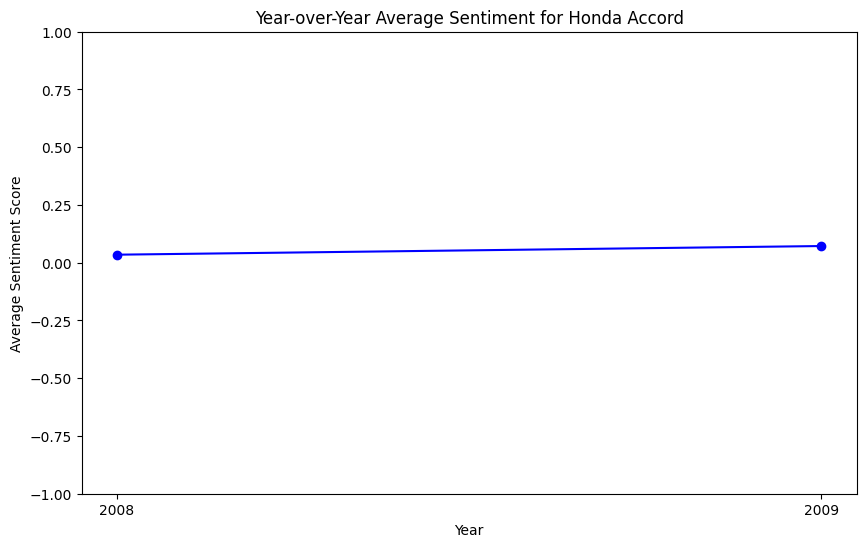

In [22]:
years = ['2008', '2009']
avg_sentiments_honda = [avg_sentiment_honda_2008, avg_sentiment_honda_2009]

plt.figure(figsize=(10, 6))
plt.plot(years, avg_sentiments_honda, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.title('Year-over-Year Average Sentiment for Honda Accord')
plt.ylim(-1, 1)  # Since sentiment scores range from -1 to 1
plt.show()


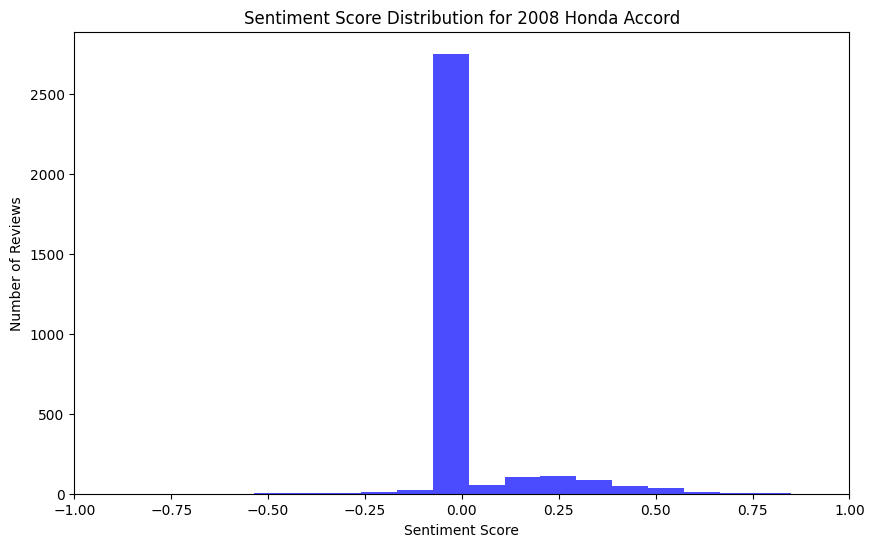

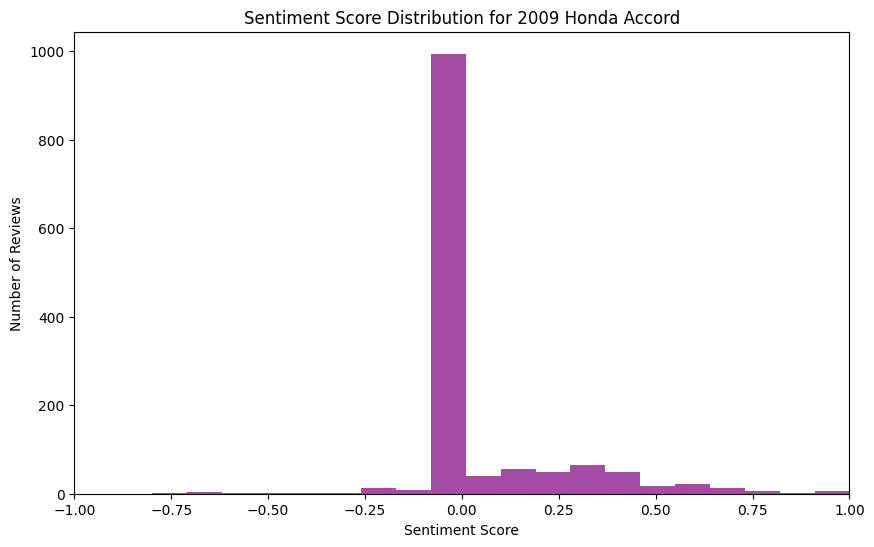

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(honda_2008_sentiments, bins=20, color='blue', alpha=0.7)
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Score Distribution for 2008 Honda Accord')
plt.xlim(-1, 1)  # Sentiment scores range from -1 to 1
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(honda_2009_sentiments, bins=20, color='purple', alpha=0.7)
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Score Distribution for 2009 Honda Accord')
plt.xlim(-1, 1)  # Sentiment scores range from -1 to 1
plt.show()




c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


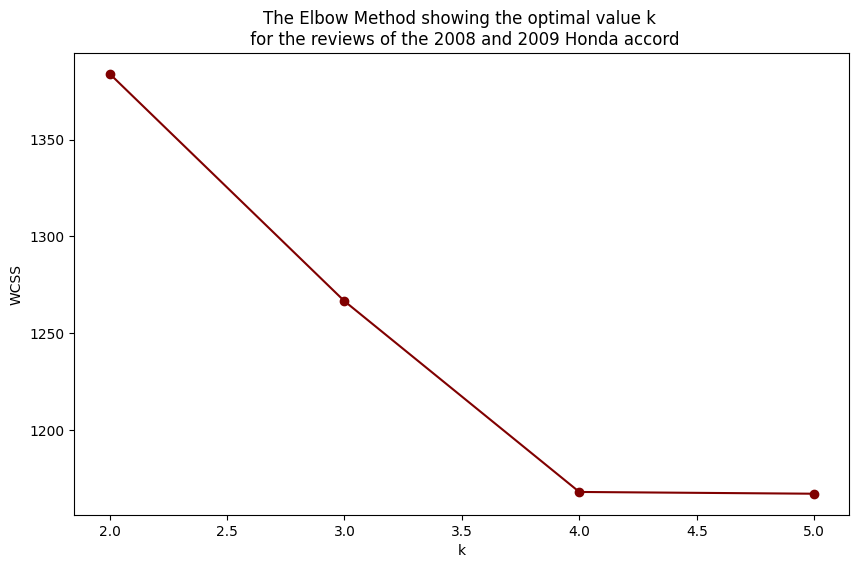

 When using the 2008 and 2009 Honda Accord review data in our k means analysis we observe that: 
The optimal value of K increased to k=4 from k=3 when just using the 2008 Honda Accord review data.
This illustrates to us that as the data increases in complexity, which in our case was more reviews, 
  the more clusters are required to represent the underlying patterns in the data.


In [24]:
#- h) (_optional_) If you find that the algorithm used in Question 3 does not provide satisfactory performance, you can try incorporating the datasets `2008_honda_accord` and `2009_honda_accord` to cluster the reviews again, aiming for better results.

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Convert the cleaned reviews to a matrix of TF-IDF features.
tfidf_vectorizer = TfidfVectorizer()
honda_08_09_data = honda_2008_reviews_un + honda_2009_reviews_un
tfidf_matrix = tfidf_vectorizer.fit_transform(honda_08_09_data)

# Calculate WCSS for different values of k.
wcss = []
K = range(2, 6)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42)
    k_means.fit(tfidf_matrix)
    wcss.append(k_means.inertia_)
    clusters = k_means.labels_

# Plot the results to observe 'The Elbow'
plt.figure(figsize=(10,6))
plt.plot(K, wcss, 'o-', color='maroon')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal value k \n for the reviews of the 2008 and 2009 Honda accord')
plt.show()


# Evaluation comment
print("\033[1m When using the 2008 and 2009 Honda Accord review data in our k means analysis we observe that: \033[0m")
print("The optimal value of K increased to k=4 from k=3 when just using the 2008 Honda Accord review data.")
print("This illustrates to us that as the data increases in complexity, which in our case was more reviews, \n ",
      "the more clusters are required to represent the underlying patterns in the data.")



In [25]:
## The end